In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')
df_all_raw = pd.concat([df_train_raw, df_train_raw], axis=0)

df_train = df_train_raw
df_test = df_test_raw
df_all = df_all_raw

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df_columns = df_train.columns
df_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

데이터 분석을 시도.
1. 수치형 데이터와 그렇지 않은 데이터 분리 후 각각 관찰

In [12]:
numeric_data = df_train.select_dtypes(include=['number']) #숫자형 데이터만 분리
non_numeric_data = df_train.select_dtypes(exclude=['number']) #그렇지 않은 데이터

numeric_data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


수치형 데이터들의 상관관계 분석

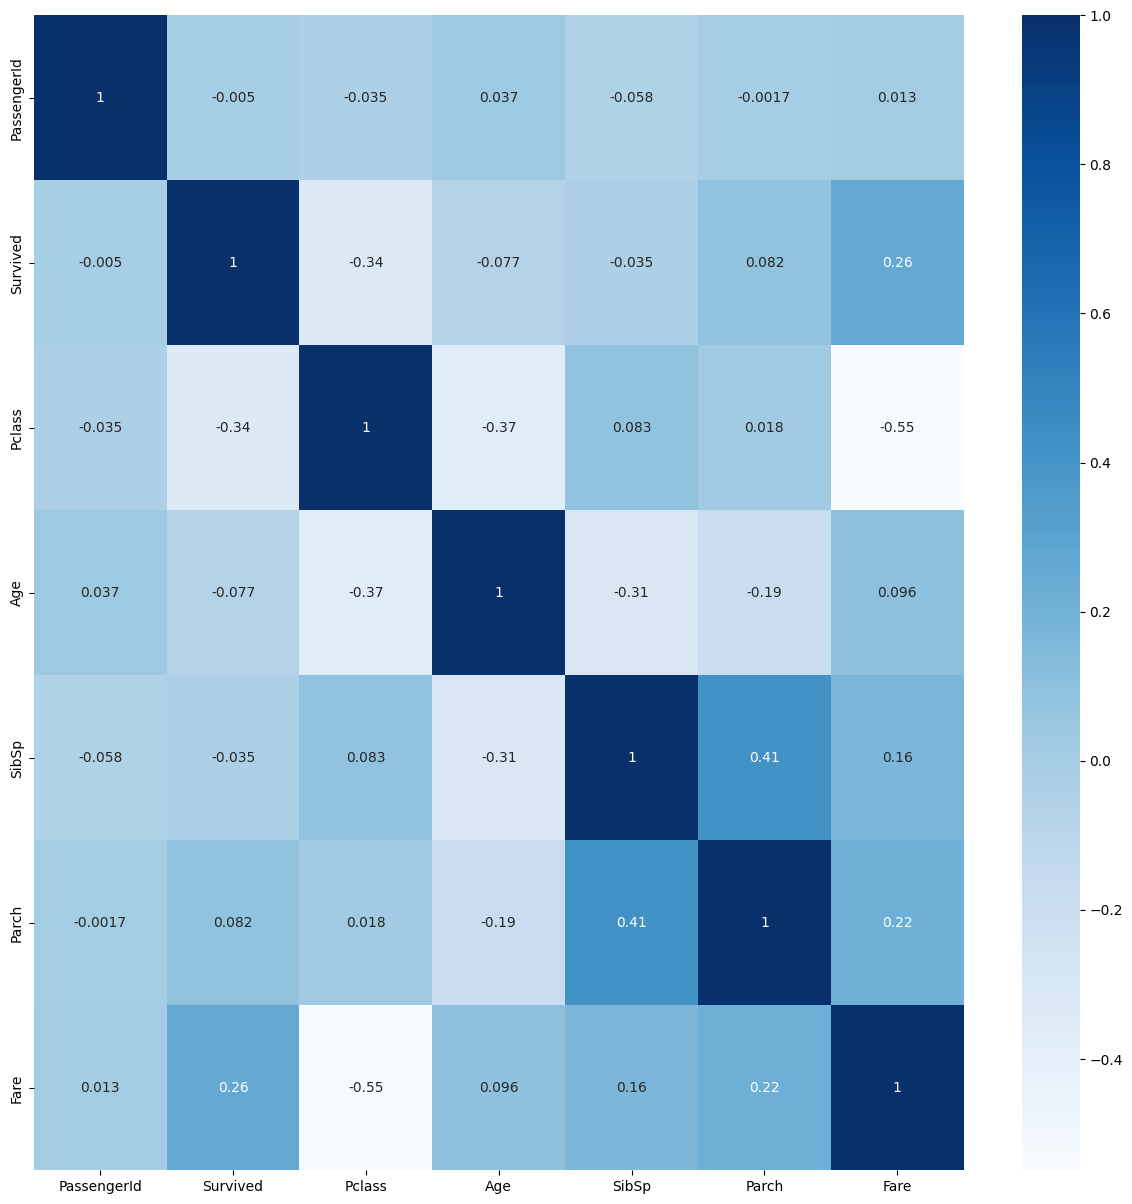

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=numeric_data.corr(),annot=True, cmap='Blues')
plt.show()

array([[<Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='Survived', ylabel='Pclass'>],
       [<Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='Survived', ylabel='Fare'>],
       [<Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>]], dtype=object)

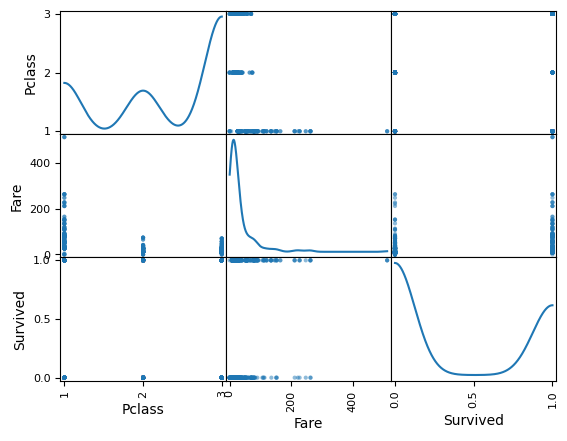

In [84]:
from pandas.plotting import scatter_matrix
import scipy

chosen_features = ['Pclass', 'Fare', 'Survived']
scatter_matrix(df_train[chosen_features], diagonal='kde')

Surived와 연관이 높은 데이터셋들을 고르면 아래와 같다.

In [19]:
corr_matrix = numeric_data.corr()
corr_survival = corr_matrix['Survived']
corr_survival = corr_survival.sort_values()
corr_survival

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

Pclass와 Fare은 수치상 어느정도 상관관계가 있다 판단된다.
- Pclass: 좌석의 등급수 이다. 이는 Fare과 관계가 필시 있을것이다.
- 마침 fare이다. 그렇다면 이들의 티켓과 생존율에 대한 정보를 그래프로 시각화해보자

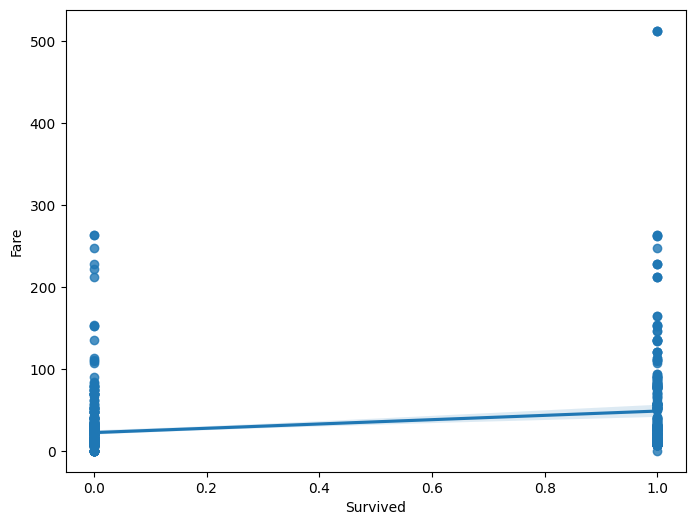

In [20]:
plt.figure(figsize=(8,6))
sns.regplot(x=df_train['Survived'], y=df_train['Fare'])
plt.show()

생각해보니, Survived가 연속형 자료가 아니라서 이걸론 제대로 판단이 안될거같다..

In [21]:
pclass_values = df_train['Pclass'].value_counts().sort_index()
pclass_values

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [22]:
pclass_survival_values = df_train[df_train['Survived'] == 1]['Pclass'].value_counts().sort_index()
pclass_survival_values

Pclass
1    136
2     87
3    119
Name: count, dtype: int64

In [23]:
pclass_survival_ratio = pclass_survival_values/pclass_values
pclass_survival_ratio

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: count, dtype: float64

높은 pclass에 대해서는 높은 생존율을 보여준다.

suvived는 연속형 수치가 아니고, fare은 연속형 수치와 유사함으로 pclass와 fare의 관계를 분석하는것이 합당하다 생각된다 

In [24]:
fares = df_train['Fare']
fares.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

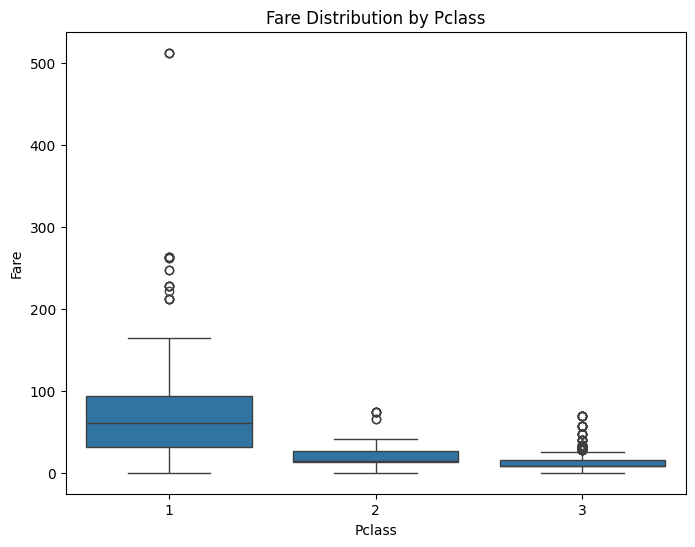

In [25]:
# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 박스플롯 그리기
sns.boxplot(x='Pclass', y='Fare', data=df_train)

# 제목과 라벨 설정
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')

# 그래프 보여주기
plt.show()

보아하니 비쌀수록 낮은숫자의 등급을 받았고, 또한 그런 높은 등급의 사람들의 생존률이 높다는걸 알수있다.

Age에 대한 절댓값 상관관계도 어느정도 높으니, 이를 분석해보자


In [26]:
df_train['Age'].value_counts() # 거의 연속형 자료이다. 

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

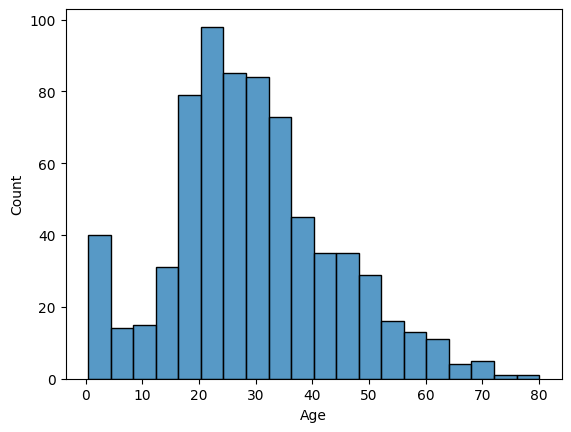

In [27]:
sns.histplot(df_train['Age'])
plt.show()

젋은층의 나이대가 가장 많다. 나이대별로 데이터를 나눠서 생존률을 분석해 보겠다. 나이대 구간을 10살로 할 예정이다.

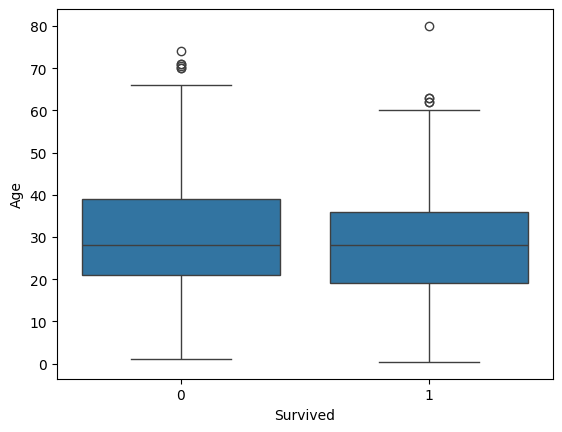

In [28]:
sns.boxplot(x=df_train['Survived'], y=df_train['Age'])
plt.show()

In [29]:
# 나이대 구간 설정 (10살 단위)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# 나이를 10살 단위로 분류
df_grouped_age = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_train['AgeGroup'] = df_grouped_age

grouped_age_count = df_grouped_age.value_counts().sort_index()

grouped_age_survived_count = df_train[df_train['Survived'] == 1]['AgeGroup'].value_counts().sort_index()

group_age_survival_rate = grouped_age_survived_count / grouped_age_count
group_age_survival_rate

AgeGroup
0-9       0.612903
10-19     0.401961
20-29     0.350000
30-39     0.437126
40-49     0.382022
50-59     0.416667
60-69     0.315789
70-79     0.000000
80-89     1.000000
90-100         NaN
Name: count, dtype: float64

이런! 나이대는 생각보다 생존률과 연관이 있어보인다! 어린아이들은 생존율이 높아 보인다. 70대 이상은 데이터에서 제외하는 방안도 생각해 봐야겠다

이제 parch와 sibsp에 대해서 조사해보자. 아이들의 생존율이 높음으로 parch같은 경우는 상관관계가 해석하지 못했던 또다른 포인트가 있을거라 생각된다

In [82]:
# parch 조사 parch가 있다는것은, 보호할 사람이 있다는뜻! 즉 부모일 경우가 크다.
parch = df_train['Parch'].value_counts().sort_index()
survived_parch = df_train[df_train['Survived'] == 1]['Parch'].value_counts().sort_index()
parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

In [31]:
survived_parch

Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64

In [32]:
parch_survived_rate = survived_parch/parch
parch_survived_rate

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: count, dtype: float64

아이가 3명이 넘는 경우의 데이터는 숫자가 너무 적으니 제외하고 분석을해도 크게 아이들의 숫자와 상관관계가 있나 싶다. 
다만 아이가 있는 아빠와 엄마의 생존율이 같을지가 궁금하다. 이는 추후 분석해보자.

내가 판단하기보단 제외한 데이터로도 훈련해보고, 포함한 데이터로도 훈련해서 비교해보는게 나을거 같다.

Sibsp에 대해서도 분석해보자.

In [33]:
#SibSp 동승자 의 숫자일것이다, (아내나 친척등의 가족 수이다.) parch + sibsp는 가족의 숫자일것이다.
sibsp = df_train['SibSp'].value_counts().sort_index()
survived_sibsp = df_train[df_train['Survived'] == 1]['SibSp'].value_counts().sort_index()
print(survived_sibsp)
print(sibsp)

SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


거의 대부분 배우자나 다른 가족없이 혼자 탑승했다. (자식 제외)

In [34]:
df_train['SibSp'].isnull().sum()

0

In [35]:
sibsp_survival_rate = survived_sibsp / sibsp
sibsp_survival_rate

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: count, dtype: float64

거의 대부분 

Pclass        -0.338481  : 원핫 인코딩 해서 사용

Age           -0.077221  : 10살 범주로 나이대를 그룹화 한 후 사용(너무 적은 나이대의 범주데이터는 없애기) or 곧바로 표준화후 사용

SibSp         -0.035322  : 너무 상관관계가 낮음으로 아예 제외 / 일단 사용 (추후 차원축소시 제외 가능)

PassengerId   -0.005007  : 너무 상관관계가 낮음으로 아예 제외

Parch          0.081629  : 너무 상관관계가 낮음으로 아예 제외 / 일단 사용 (추후 차원축소시 제외 가능)

Fare           0.257307  : 표준화 후 사용

Survived       1.000000

#궁금한점#

자식들이 있는 남자/여자의 생존율 차이가 궁금하다.

이제부턴 수치형 데이터가 아닌! 데이터들에 대한 분석을 더해보자!

In [36]:
non_numeric_columns = non_numeric_data.columns
print(non_numeric_columns)
non_numeric_data

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [37]:
non_numeric_data.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

cabin의 경우에는 아예 제거를 해야할거 같고, Embarked같은 경우는 2개밖에없음으로 해당 행 2개만 제거하자.

Name          0     : 호칭 부분만 떼어내어서 관찰

Sex           0     : 원핫 인코딩

Ticket        0     : 삭제

Cabin       687     : 삭제

Embarked      2     : 원핫 인코딩

In [57]:
name_df = df_train['Name'].str.split(pat='[,.]', n=2, expand = True)
name_df

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
886,Montvila,Rev,Juozas
887,Graham,Miss,Margaret Edith
888,Johnston,Miss,"Catherine Helen ""Carrie"""
889,Behr,Mr,Karl Howell


In [61]:
df_train['honorific'] = name_df[1].str.strip()
df_train['honorific']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: honorific, Length: 891, dtype: object

Mr              517

Miss            182

Mrs             125

Master           40

외에는 그냥 else로 처리해도 될거같은 수치이다.

In [64]:
def honorifics_classify(df_honorific):
    honorific_list = ['Mr', 'Miss', 'Mrs' ,'Master']
    return df_honorific if df_honorific in honorific_list else 'else'
    
df_train['honorific'] = df_train['honorific'].apply(honorifics_classify)
honorifics_counts =  df_train['honorific'].value_counts()

df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39,Mr


In [67]:
honorific_count = df_train['honorific'].value_counts().sort_index()
honorific_survival_count = df_train[df_train['Survived'] == 1]['honorific'].value_counts().sort_index()
honorific_survival_rate = honorific_survival_count / honorific_count
honorific_survival_rate

honorific
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
else      0.444444
Name: count, dtype: float64

In [81]:
embarks = df_train['Embarked'].value_counts().sort_index()
survival_embarked = df_train[df_train['Survived'] == 1]['Embarked'].value_counts().sort_index()
embarks_survival_rate = survival_embarked / embarks
embarks_survival_rate

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: count, dtype: float64

맙소사! 남자 mr들의 생존률은 말도안되게 낮다. 기에반해 여성은 매우 높은 생존율을 보인다. 하 ㅜ 슬프다 아버지들의 희생..

그럼 궁금했던 parch에 따른 남녀 생존율 비율을 알아보자. 홀몸인 남성과, 자녀 또는 배우자가 있는 남편의 생존율 차이가 궁금해진다.

In [75]:
# 여러조건을 연걸할때는 '&' 연산자를 사용한다. 조건들은 '()'로 묶어야 오류가 안난다.

# 자식이나 배우자가 아무도 없이 혼자 탑승한 남자의 사망 비율을 알아보자.
df_train[(df_train['Parch'] == 0) & (df_train['SibSp'] == 0) & (df_train['Sex'] == 'male')]['Survived'].value_counts()


Survived
0    347
1     64
Name: count, dtype: int64

In [77]:
# 자식이나 배우자가 있는 남자의 사망비율을 알아보자
df_train[((df_train['Parch'] != 0) | (df_train['SibSp'] != 0)) & (df_train['Sex'] == 'male')]['Survived'].value_counts()

Survived
0    121
1     45
Name: count, dtype: int64

In [78]:
# 자식이나 배우자가 아무도 없이 혼자 탑승한 여자의 사망 비율을 알아보자.
df_train[(df_train['Parch'] == 0) & (df_train['SibSp'] == 0) & (df_train['Sex'] == 'female')]['Survived'].value_counts()

Survived
1    99
0    27
Name: count, dtype: int64

In [79]:
# 자식이나 배우자가 있는 여자의 사망비율을 알아보자
df_train[((df_train['Parch'] != 0) | (df_train['SibSp'] != 0)) & (df_train['Sex'] == 'female')]['Survived'].value_counts()

Survived
1    134
0     54
Name: count, dtype: int64

## 데이터 분석결과
### 수치형이 아닌 데이터
Name              : 호칭만 원핫 인코딩 (5개 인코딩)

Sex               : 원핫 인코딩

Ticket            : 삭제

Cabin             : 삭제

Embarked          : 원핫 인코딩 - 생존율의 차이는 크게 없어서 추후에 제거 가능


### 수치형 데이터
Pclass        -0.338481  : 원핫 인코딩 해서 사용

Age           -0.077221  : 10살 범주로 나이대를 그룹화 한 후 사용(너무 적은 나이대의 범주데이터는 없애기) or 곧바로 표준화후 사용

SibSp         -0.035322  : 삭제

PassengerId   -0.005007  : 삭제

Parch          0.081629  : 삭제

Fare           0.257307  : 표준화 후 사용

### 추가 분석 결과

Parch나 Sibsp의 유무와 별개로 그냥 여성의 생존율이 남성의 생존율보다 압도적으로 높았다.
parch와 Sibsp는 일단 제거하고 컴퓨팅 자원의 여력이 있으면 그제서야 추가해서 훈련하는게 나을듯하다.